In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [3]:

file_path = r"C:\Users\DELL\Desktop\Mall_Customers.csv"  # Replace with your path
df = pd.read_csv(file_path, encoding='latin1')
print(df.head())
print(df.info())
print(df.describe())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
       CustomerID         Age  Annual Income (k$)  

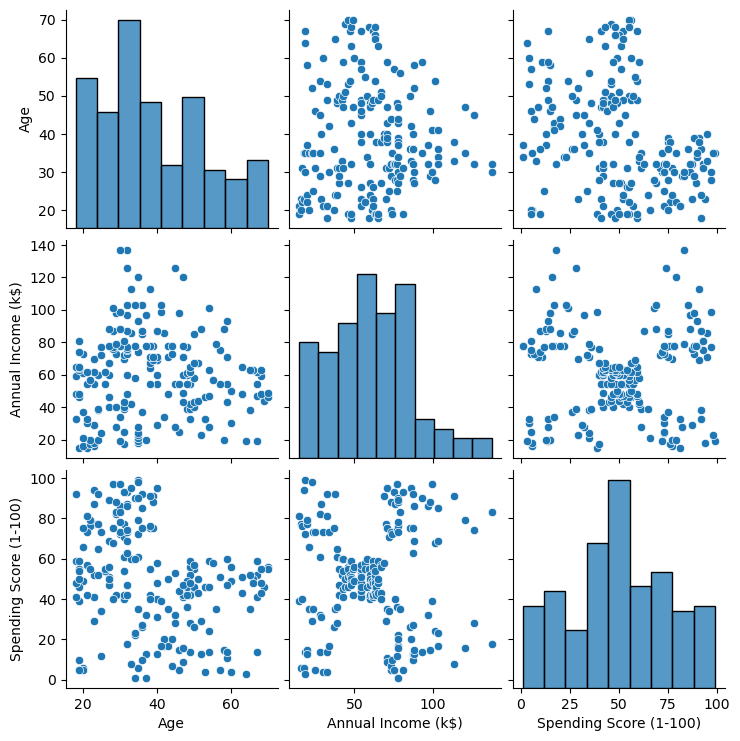

In [7]:
sns.pairplot(df[['Age','Annual Income (k$)','Spending Score (1-100)']])
plt.show()

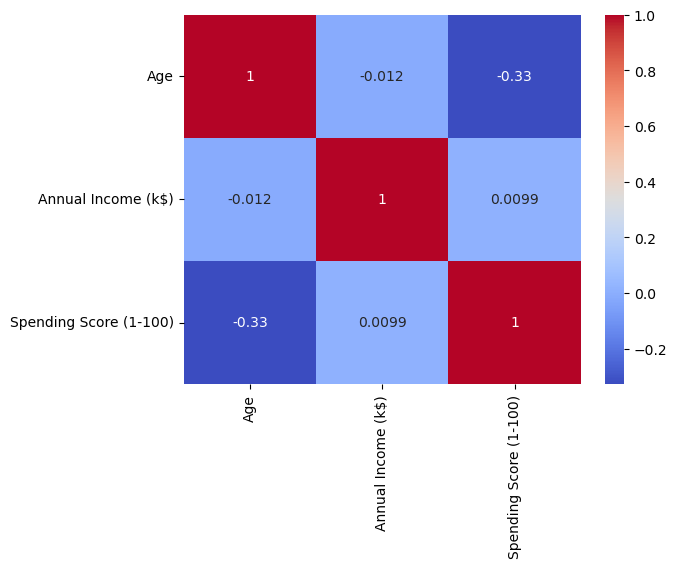

In [9]:
sns.heatmap(df[['Age','Annual Income (k$)','Spending Score (1-100)']].corr(), annot=True, cmap='coolwarm')
plt.show()

In [11]:
X = df[['Annual Income (k$)','Spending Score (1-100)']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [37]:
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
df['Cluster'] = clusters

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


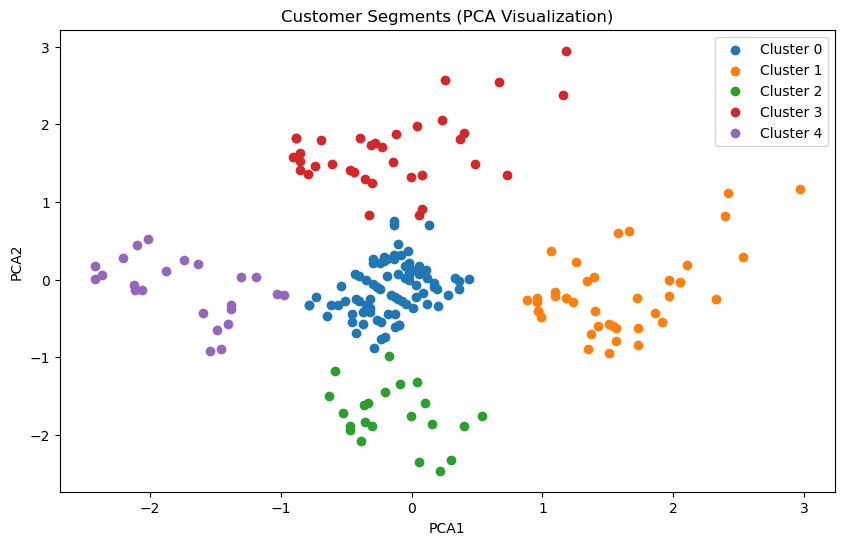

In [39]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10,6))
for cluster in range(k):
    plt.scatter(X_pca[clusters==cluster,0], X_pca[clusters==cluster,1], label=f'Cluster {cluster}')
plt.title("Customer Segments (PCA Visualization)")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.legend()
plt.show()

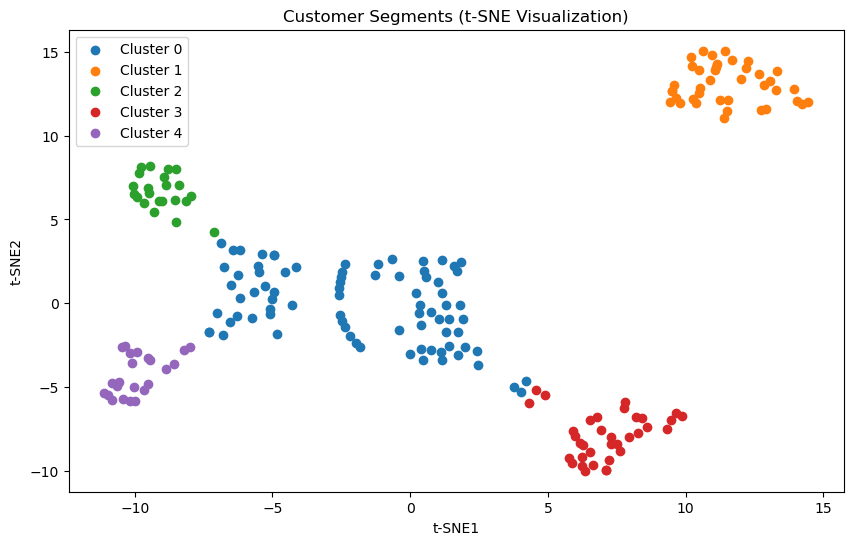

In [41]:
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

plt.figure(figsize=(10,6))
for cluster in range(k):
    plt.scatter(X_tsne[clusters==cluster,0], X_tsne[clusters==cluster,1], label=f'Cluster {cluster}')
plt.title("Customer Segments (t-SNE Visualization)")
plt.xlabel("t-SNE1")
plt.ylabel("t-SNE2")
plt.legend()
plt.show()

In [43]:
cluster_summary = df.groupby('Cluster')[['Age','Annual Income (k$)','Spending Score (1-100)']].mean()
print(cluster_summary)

# Suggested marketing strategies
for i, row in cluster_summary.iterrows():
    print(f"\nCluster {i}:")
    if row['Spending Score (1-100)'] > 60:
        print("High spending customers – target with premium products and loyalty programs.")
    elif row['Spending Score (1-100)'] < 40:
        print("Low spending customers – offer discounts, promotions, or engagement campaigns.")
    else:
        print("Medium spending customers – cross-sell and upsell products.")

               Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                       
0        42.716049           55.296296               49.518519
1        32.692308           86.538462               82.128205
2        25.272727           25.727273               79.363636
3        41.114286           88.200000               17.114286
4        45.217391           26.304348               20.913043

Cluster 0:
Medium spending customers – cross-sell and upsell products.

Cluster 1:
High spending customers – target with premium products and loyalty programs.

Cluster 2:
High spending customers – target with premium products and loyalty programs.

Cluster 3:
Low spending customers – offer discounts, promotions, or engagement campaigns.

Cluster 4:
Low spending customers – offer discounts, promotions, or engagement campaigns.
